In [1]:
from seeing import *

propMethodsCartesian = Formulary.loadFromFile('Propagation100.frm')

approximations = [
    "Rayleigh-Sommerfeld",
    "Approximate Rayleigh-Sommerfeld",
    "Near Fresnel",
    "Far Fresnel"]

propMethodsCartesian.display(approximations)

Rayleigh-Sommerfeld


Eq(E_1(x_1, y_1, z_1), Integral(-I*E_0*z_1*(I*lambda*(1/(2*pi*sqrt(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2))) + 1)*exp(2*I*pi*sqrt(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2)/lambda)/(lambda*(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2)), (x_0, -a, a), (y_0, -a, a)))

Approximate Rayleigh-Sommerfeld


Eq(E_1(x_1, y_1, z_1), Integral(-I*E_0*z_1*exp(2*I*pi*sqrt(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2)/lambda)/(lambda*(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2)), (x_0, -a, a), (y_0, -a, a)))

Near Fresnel


Eq(E_1(x_1, y_1, z_1), Integral(-I*E_0*exp(2*I*pi*z_1/lambda)*exp(I*pi*((-x_0 + x_1)**2 + (-y_0 + y_1)**2)/(lambda*z_1))/(lambda*z_1), (x_0, -a, a), (y_0, -a, a)))

Far Fresnel


Eq(E_1(x_1, y_1, z_1), Integral(-I*E_0*exp(2*I*pi*z_1/lambda)*exp(I*pi*(x_0**2 + y_0**2)/(lambda*z_1))*exp(2*I*pi*(x_0*x_1 + y_0*y_1)/(lambda*z_1))/(lambda*z_1), (x_0, -a, a), (y_0, -a, a)))

In [2]:
waveLength = 10e-6
apertureRadius =  waveLength*10
mCalc = Calculator(cp, cp.float64, 'intensity')
xyCircle = propMethodsCartesian.getFormula('xyCircle')

Rayleigh-Sommerfeld Arg


-I*E_0*z_1*(I*lambda*(1/(2*pi*sqrt(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2))) + 1)*exp(2*I*pi*sqrt(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2)/lambda)/(lambda*(z_1**2 + (-x_0 + x_1)**2 + (-y_0 + y_1)**2))

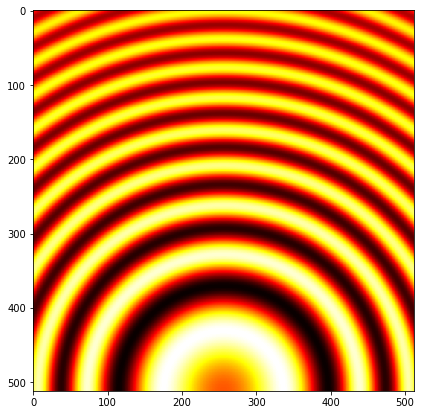

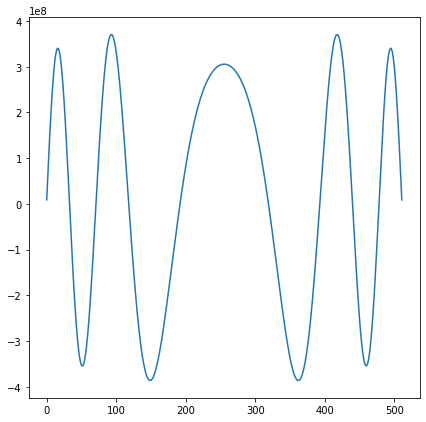

In [3]:
propMethodsCartesian.display(["Rayleigh-Sommerfeld Arg"])

subdiv_points = 512
#ez0_c =  subsParamsByName( xyCircle, {'a':apertureRadius, 'x_0': 0.1, 'y_0': apertureRadius} )
subsDictC = {'E_0': 1, 'z_1': 2*apertureRadius, 'x_0': 0, 'y_0': apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
paramAndRanges = [( 'x_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' ),
                  ( 'y_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' )]

#xx, ez = propMethodsCartesian.evaluateFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)
#fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow( np.real(ez), cmap='hot' )

propMethodsCartesian.plotFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)

paramAndRanges = [( 'x_1', -apertureRadius, apertureRadius, subdiv_points, 'linear' )]

subsDictC = {'E_0': 1, 'z_1': 2*apertureRadius, 'y_1':0.0, 'x_0': 0, 'y_0': apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
propMethodsCartesian.plotFormula("Rayleigh-Sommerfeld Arg", subsDictC, paramAndRanges, mCalc)

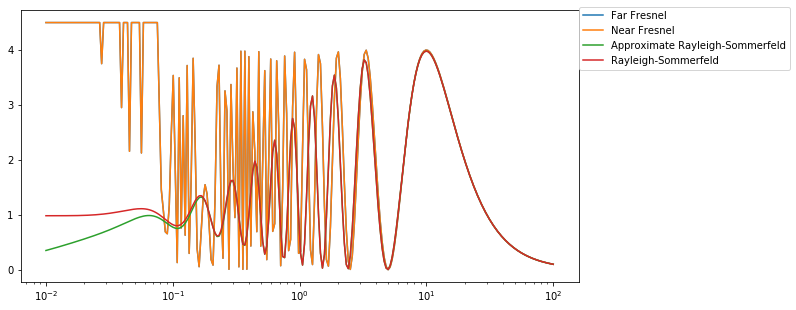

In [4]:
subdiv_points = 256
ez0_c =  subsParamsByName( xyCircle, {'a':apertureRadius} )
subsDictC = {'E_0': ez0_c, 'x_1': 0, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}
paramAndRange = ( 'z_1', 0.01*apertureRadius, apertureRadius*100, subdiv_points, 'geometric' )

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')

for appr in reversed(approximations):
    eeq = propMethodsCartesian.getFormula(appr)
    xplot2, zplot2 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDictC), [paramAndRange], None, 'trap')
    plt.plot(xplot2[0]/apertureRadius, np.clip(zplot2, -4.5, 4.5), label=appr)
        
plt.legend(loc=(1.0, 0.78))
plt.show()

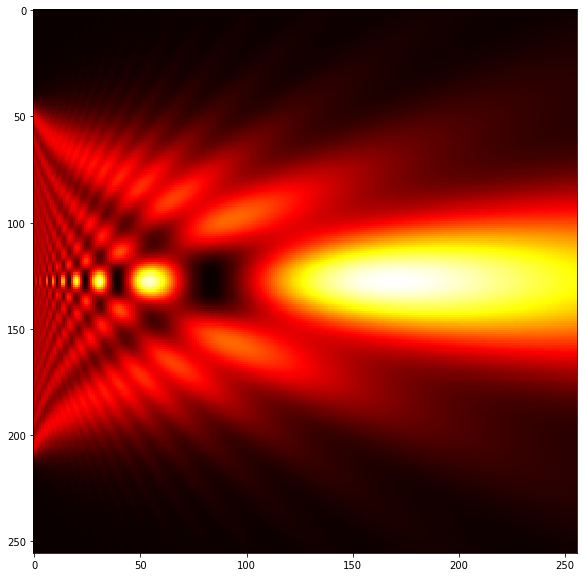

In [5]:
subdiv_points = 256
ez0_l =  subsParamsByName( xyCircle, {'a':apertureRadius} )
subsDict = {'E_0': ez0_l, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}
paramsAndRanges = [ ('x_1', -1.5*apertureRadius, 1.5*apertureRadius, subdiv_points, 'linear'), ('z_1',  waveLength, 15*apertureRadius, subdiv_points, 'linear')]
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")

xplot, fplot1 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDict), paramsAndRanges) 

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow( fplot1, cmap='hot' )

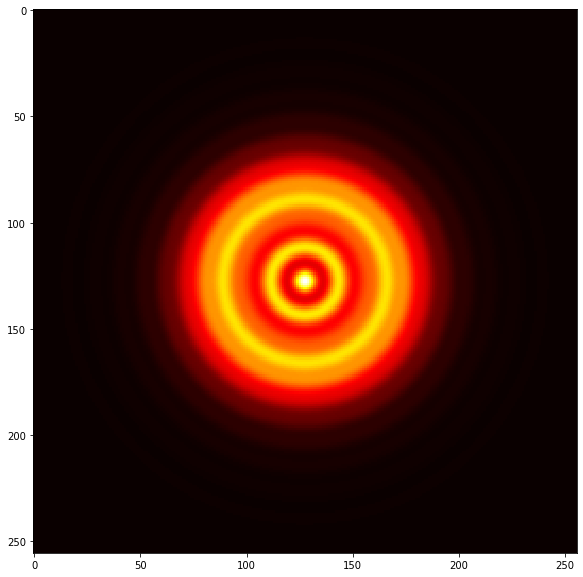

In [6]:
subsDict = {'E_0': ez0_l, 'z_1': 2*apertureRadius, 'lambda': waveLength, 'a':apertureRadius}
paramsAndRanges = [ ('x_1', -2*apertureRadius, 2*apertureRadius, subdiv_points, 'linear'), ('y_1', -2*apertureRadius, 2*apertureRadius, subdiv_points, 'linear')]
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")

xplot, fplot1 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDict), paramsAndRanges) 

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow( np.log(fplot1+1), cmap='hot' )

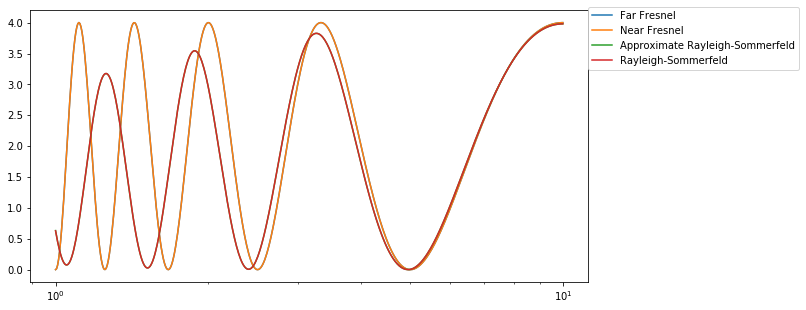

In [7]:
approximationsF = [
    "Rayleigh-Sommerfeld",
    "Far Fresnel"]

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')

paramAndRange = ( 'z_1', apertureRadius, apertureRadius*10, 500, 'geometric' )
subsDictC = {'E_0': ez0_l, 'x_1': 0, 'y_1': 0, 'lambda': waveLength, 'a':apertureRadius}

for appr in reversed(approximations):
    eeq = propMethodsCartesian.getFormula(appr)
    xplot2, zplot2 = mCalc.IntegralEvalE(subsParamsByName(eeq, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'rect')
    plt.plot(xplot2[0]/apertureRadius, np.clip(zplot2, -4.5, 4.5), label=appr)
        
plt.legend(loc=(1.0, 0.78))
plt.show()

Eq(W_phi(rho), Integral(0.0229*(-1)**m_k*2**((-0.5)*KroneckerDelta(0, m_j) - 0.5*KroneckerDelta(0, m_k) + 1)*I**(n_j + n_k)*sqrt((n_j + 1)*(n_k + 1))*(I**(3*m_j + 3*m_k)*cos(theta*(m_j + m_k) + pi*((1 - KroneckerDelta(0, m_j))*((-1)**j - 1) + (1 - KroneckerDelta(0, m_k))*((-1)**k - 1))/4)*besselj(m_j + m_k, 2*pi*f*h*rho) + I**(3*Abs(m_j - m_k))*cos(theta*(m_j - m_k) + pi*((1 - KroneckerDelta(0, m_j))*((-1)**j - 1) - (1 - KroneckerDelta(0, m_k))*((-1)**k - 1))/4)*besselj(Abs(m_j - m_k), 2*pi*f*h*rho))*besselj(n_j + 1, 2*pi*R_1*f)*besselj(n_j + 1, 2*pi*R_2*f)/((pi*R_1*R_2*f*r_0**(5/3)*((1/L_0)**2 + f**2)**(11/6))), (f, f_min, f_max)))

Eq(W_phi(rho), Integral(-0.135193784634899*besselj(2, 8.0*pi*f)**2*besselj(2, 20000*pi*f*rho)/(pi*f*(f**2 + 0.0016)**(11/6)), (f, 0.001, 10)))

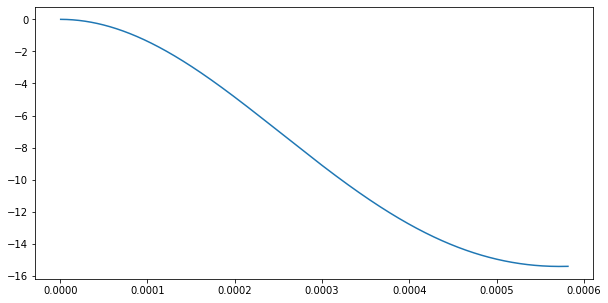

In [9]:
from seeing import *
from zernike import *

#mf.writeToFile('Mavis.frm')
mf = Formulary.loadFromFile('Mavis.frm')

mIt = Integrator(cp, cp.float64, 'none')
covIntegral = mf['ZernikeCovarianceI']
display(covIntegral)

r0_Value = 0.15 # [m]
L0_Value = 25.0 # [m]
TelescopeDiameter = 8.0 #[m]
DM_height = 10000 # [m]

paramsDict = {'f_min':0.001, 'f_max':10, 'theta': np.pi/4.0, 'L_0': L0_Value, 
              'r_0': r0_Value, 'R_1': TelescopeDiameter/2.0, 'R_2': TelescopeDiameter/2.0,
              'h': DM_height }

_integral1 = subsParamsByName( cov_expr_jk(covIntegral, 2, 3), paramsDict)
display(_integral1)

rho_max = 120.0/206265.0
xplot1, zplot1 = mIt.IntegralEvalE(_integral1, [('rho',  0.0, rho_max, 1000, 'linear')], [(1024, 'linear')], method='rect')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xplot1[0], zplot1)
plt.show()